# Step 1: Import the Necessary Modules

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Step 2: Obtain the Dataset

In [2]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                  header=None)
iris.columns = ["sepal_length","sepal_width",
                'petal_length','petal_width','species']
iris.dropna(how='all', inplace=True)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Step 3: Visualising data

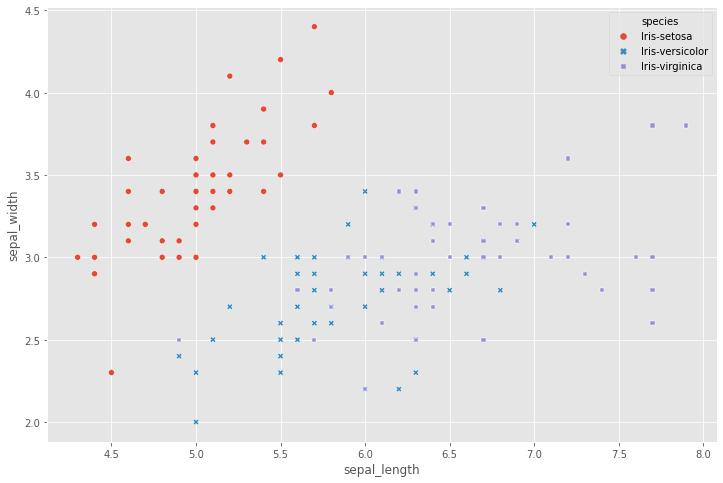

In [3]:
# Plotting data using seaborn
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (12,8)
sns.scatterplot(x = iris.sepal_length, y=iris.sepal_width,
               hue = iris.species, style=iris.species)

# Step 4: Standardizing the Data

In [4]:
def standardize_data(arr):
         
    '''
    This function standardize an array, its substracts mean value, 
    and then divide the standard deviation.
    
    param 1: array 
    return: standardized array
    '''    
    rows, columns = arr.shape
    
    standardizedArray = np.zeros(shape=(rows, columns))
    tempArray = np.zeros(rows)
    
    for column in range(columns):
        
        mean = np.mean(X[:,column])
        std = np.std(X[:,column])
        tempArray = np.empty(0)
        
        for element in X[:,column]:
            
            tempArray = np.append(tempArray, ((element - mean) / std))
 
        standardizedArray[:,column] = tempArray
    
    return standardizedArray

In [5]:
# Standardizing data
X = iris.iloc[:, 0:4].values
y = iris.species.values
X = standardize_data(X)

X

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

# Computing the Eigenvectors and Eigenvalues

**1. Calculating the covariance matrix**

In [6]:
# Calculating the covariance matrix
covariance_matrix = np.cov(X.T)
covariance_matrix

array([[ 1.00671141, -0.11010327,  0.87760486,  0.82344326],
       [-0.11010327,  1.00671141, -0.42333835, -0.358937  ],
       [ 0.87760486, -0.42333835,  1.00671141,  0.96921855],
       [ 0.82344326, -0.358937  ,  0.96921855,  1.00671141]])

**2. Eigendecomposition of the Covariance Matrix**

In [7]:
# Using np.linalg.eig function
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]] 

Eigenvalues: 
 [2.93035378 0.92740362 0.14834223 0.02074601] 



# Picking Principal Components Using the Explained Variance

In [8]:
# Calculating the explained variance on each of components
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)
        
print(variance_explained)

[72.77045209380134, 23.03052326768065, 3.683831957627376, 0.5151926808906263]


# Project Data Onto Lower-Dimensional Linear Subspace

In [9]:
# Using two first components (because those explain more than 95%)
projection_matrix = (eigen_vectors.T[:][:2]).T
print(projection_matrix)

[[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


In [10]:
# Getting the product of original standardized X and the eigenvectors 
X_pca = X.dot(projection_matrix)
print(X_pca)

[[-2.26454173e+00 -5.05703903e-01]
 [-2.08642550e+00  6.55404729e-01]
 [-2.36795045e+00  3.18477311e-01]
 [-2.30419716e+00  5.75367713e-01]
 [-2.38877749e+00 -6.74767397e-01]
 [-2.07053681e+00 -1.51854856e+00]
 [-2.44571134e+00 -7.45626750e-02]
 [-2.23384186e+00 -2.47613932e-01]
 [-2.34195768e+00  1.09514636e+00]
 [-2.18867576e+00  4.48629048e-01]
 [-2.16348656e+00 -1.07059558e+00]
 [-2.32737775e+00 -1.58587455e-01]
 [-2.22408272e+00  7.09118158e-01]
 [-2.63971626e+00  9.38281982e-01]
 [-2.19229151e+00 -1.88997851e+00]
 [-2.25146521e+00 -2.72237108e+00]
 [-2.20275048e+00 -1.51375028e+00]
 [-2.19017916e+00 -5.14304308e-01]
 [-1.89407429e+00 -1.43111071e+00]
 [-2.33994907e+00 -1.15803343e+00]
 [-1.91455639e+00 -4.30465163e-01]
 [-2.20464540e+00 -9.52457317e-01]
 [-2.77416979e+00 -4.89517027e-01]
 [-1.82041156e+00 -1.06750793e-01]
 [-2.22821750e+00 -1.62186163e-01]
 [-1.95702401e+00  6.07892567e-01]
 [-2.05206331e+00 -2.66014312e-01]
 [-2.16819365e+00 -5.52016495e-01]
 [-2.14030596e+00 -3